# 연습문제

In [1]:
import statsmodels.api as sm
cars = sm.datasets.get_rdataset("cars")

In [2]:
cars_df = cars.data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
fit = np.polyfit(cars_df.speed, cars_df.dist, 1)
fit

array([  3.93240876, -17.57909489])

In [5]:
fit_fn = np.poly1d(fit)
fit_fn

poly1d([  3.93240876, -17.57909489])

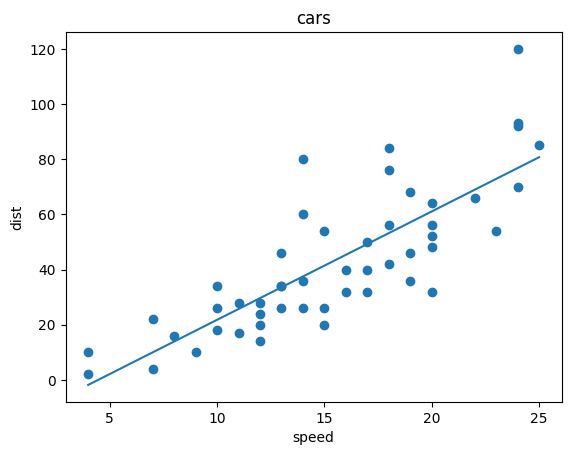

In [6]:
plt.scatter(cars_df.speed, cars_df.dist)
plt.plot(cars_df.speed, fit_fn(cars_df.speed))
plt.xlabel("speed")
plt.ylabel("dist")
plt.title("cars")
plt.show()

In [7]:
fit = np.polyfit(cars_df.speed, cars_df.dist, 5) # 각 항의 계수를 배열로 반환
fit

array([ 1.78973471e-04, -1.00395167e-02,  1.94048869e-01, -1.42612254e+00,
        5.48425932e+00, -2.65005270e+00])

In [8]:
# from numpy.polynomial.polynomial import Polynomial
# pn = Polynomial(fit)
# _ = pn.fit(cars_df.speed, cars_df.dist, 1)

In [9]:
fit_fn = np.poly1d(fit) # 항의 계수를 이용해서 함수를 정의
fit_fn

poly1d([ 1.78973471e-04, -1.00395167e-02,  1.94048869e-01, -1.42612254e+00,
        5.48425932e+00, -2.65005270e+00])

In [10]:
X = np.linspace(3,26,100)

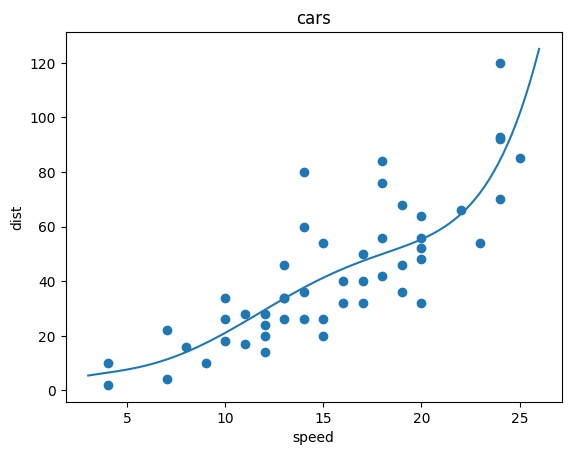

In [11]:
plt.scatter(cars_df.speed, cars_df.dist)
plt.plot(X, fit_fn(X))
plt.xlabel("speed")
plt.ylabel("dist")
plt.title("cars")
plt.show()

In [12]:
pred = fit_fn(cars_df.speed)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(cars_df.dist, pred)

0.6845866370161114

In [15]:
fit_fn.coef

array([ 1.78973471e-04, -1.00395167e-02,  1.94048869e-01, -1.42612254e+00,
        5.48425932e+00, -2.65005270e+00])

In [16]:
import statsmodels.formula.api as smf
cars_model = smf.ols(formula="dist ~ speed", data=cars_df).fit()

In [17]:
cars_model.params

Intercept   -17.579095
speed         3.932409
dtype: float64

In [18]:
cars_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sat, 27 Dec 2025   Prob (F-statistic):           1.49e-12
Time:                        17:02:23   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from scipy import stats

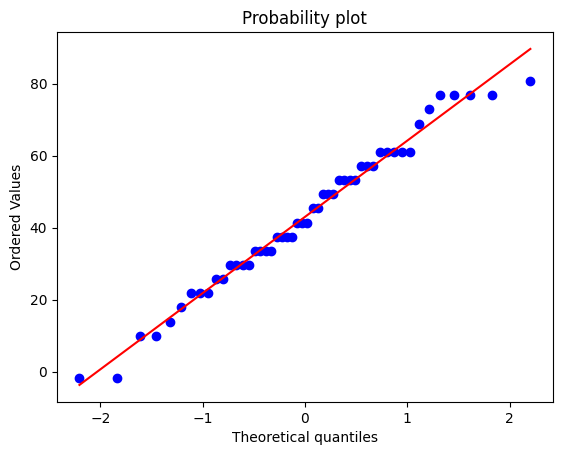

In [20]:
y_pred = cars_model.predict(cars_df)
stats.probplot(y_pred, plot=plt)
plt.title("Probability plot")
plt.show()

In [21]:
import numpy as np
influence = cars_model.get_influence()
inf_df = influence.summary_frame()
inf_df.head()

,dfb_Intercept,dfb_speed,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.094402,-0.086246,0.004592,0.266042,0.114861,0.095836,0.263450,0.094903
1,0.292425,-0.267160,0.043514,0.818933,0.114861,0.295005,0.816078,0.293977
2,-0.107498,0.093693,0.006202,-0.401346,0.071504,-0.111376,-0.397812,-0.110396
3,0.218976,-0.190855,0.025467,0.813266,0.071504,0.225687,0.810353,0.224879
4,0.034075,-0.029014,0.000645,0.142162,0.059971,0.035907,0.140703,0.035539


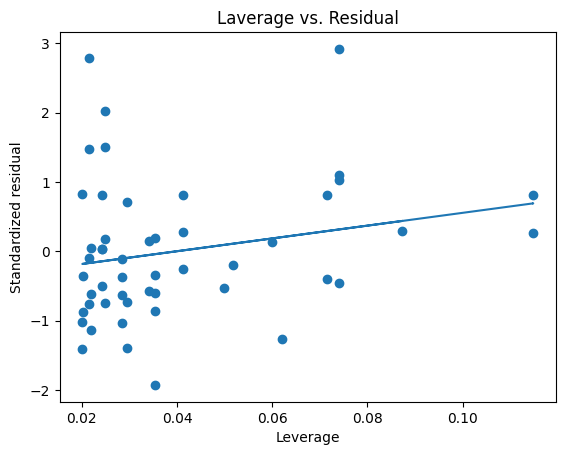

In [22]:
from sklearn.linear_model import LinearRegression
x = influence.hat_matrix_diag
y = inf_df.standard_resid
plt.scatter(x, y)
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit)
plt.plot(x, fit_fn(x))
plt.xlabel("Leverage")
plt.ylabel("Standardized residual")
plt.title("Laverage vs. Residual")
plt.show()

In [23]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

formula = "medv~" + "+".join(boston_df.columns[:-1])

In [24]:
from patsy import dmatrices
y, X = dmatrices(formula, boston_df, return_type="dataframe")

In [25]:
import pandas as pd
vif = pd.DataFrame()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                    for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by="VIF Factor", ascending=False)

,VIF Factor,features
0,585.265238,Intercept
10,9.008554,tax
9,7.484496,rad
5,4.393720,nox
3,3.991596,indus
8,3.955945,dis
7,3.100826,age
13,2.941491,lstat
2,2.298758,zn
6,1.933744,rm


In [27]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    import pandas as pd
    vif = pd.DataFrame()
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                        for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif.sort_values(by="VIF Factor", ascending=False, inplace=True)
    return vif

In [28]:
formula = "medv~" + "+".join(boston_df.columns[:-1]) + "-1"
get_vif(formula, boston_df)

,VIF Factor,features
10,85.029547,ptratio
5,77.948283,rm
4,73.894947,nox
9,61.227274,tax
6,21.386850,age
11,20.104943,black
8,15.167725,rad
7,14.699652,dis
2,14.485758,indus
12,11.102025,lstat


In [29]:
feature_cols = list(boston_df.columns[:-1])
while True :
    formula = "medv~" + "+".join(feature_cols)+"-1"
    vif = get_vif(formula, boston_df)
    if vif.iloc[0,0] > 10:
        feature_cols.remove(vif.iloc[0,1])
    else :
        break

In [30]:
vif

,VIF Factor,features
2,6.900077,indus
6,6.726973,lstat
5,4.678181,rad
4,3.968908,dis
1,2.299351,zn
0,2.067135,crim
3,1.086574,chas
